# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('previsao_de_renda.csv')
matriz = df[['index', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mau']].copy()
matriz.drop_duplicates(inplace=True)
matriz.set_index('index', inplace=True)
matriz.sort_index(inplace=True)
matriz.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
index,,,,,,
0,0,58,3.106849,2.0,10838.65,False
1,0,52,8.358904,1.0,6184.10,False
3,0,46,2.106849,2.0,6450.48,False
4,0,29,3.021918,2.0,2199.27,False
5,0,29,3.021918,2.0,1575.67,False


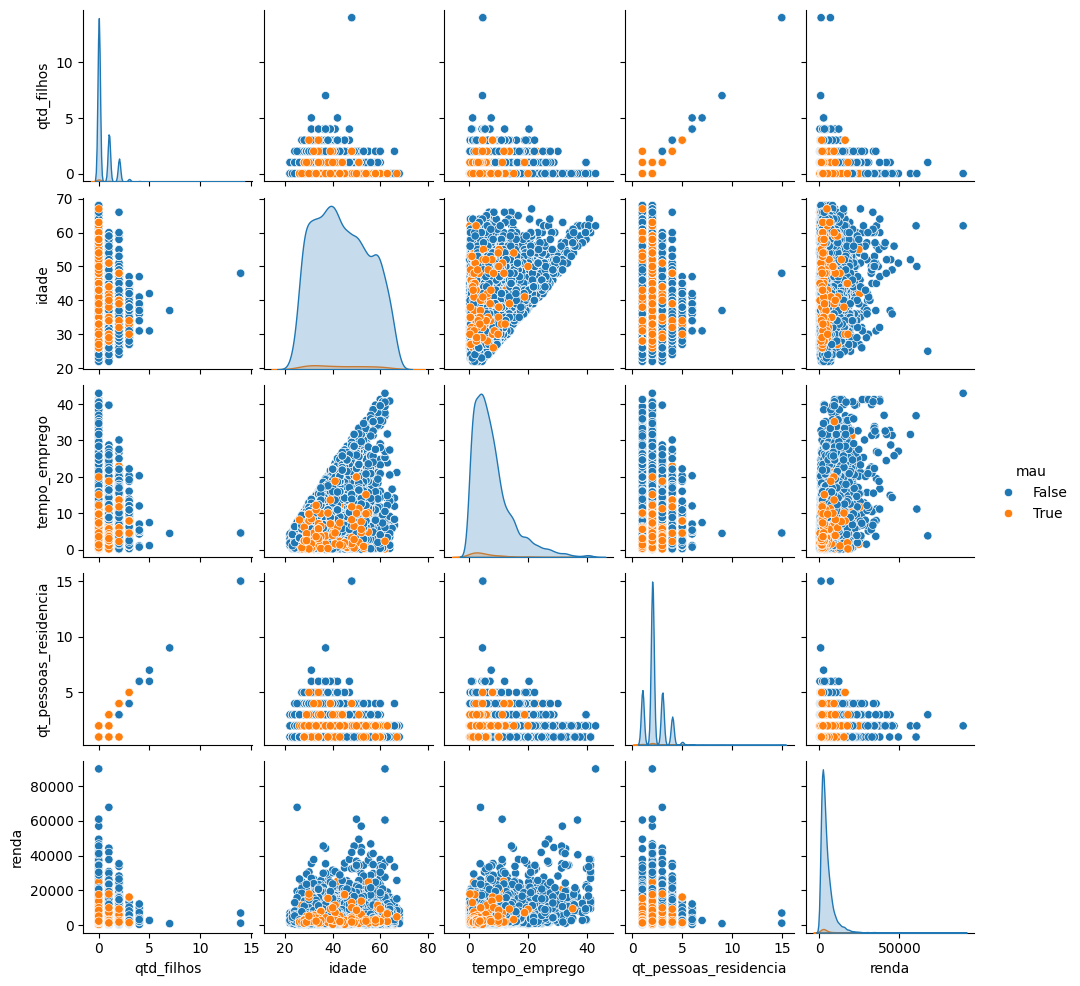

In [152]:
ax = sns.pairplot(matriz, height=2, aspect=1, hue='mau')

In [153]:
matriz.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
qtd_filhos,1.000000,-0.371231,-0.072918,0.894353,0.009769,0.004787
idade,-0.371231,1.000000,0.324236,-0.347207,0.040577,-0.004583
tempo_emprego,-0.072918,0.324236,1.000000,-0.065472,0.397654,-0.044488
qt_pessoas_residencia,0.894353,-0.347207,-0.065472,1.000000,0.019410,-0.008295
renda,0.009769,0.040577,0.397654,0.019410,1.000000,-0.010004
mau,0.004787,-0.004583,-0.044488,-0.008295,-0.010004,1.000000


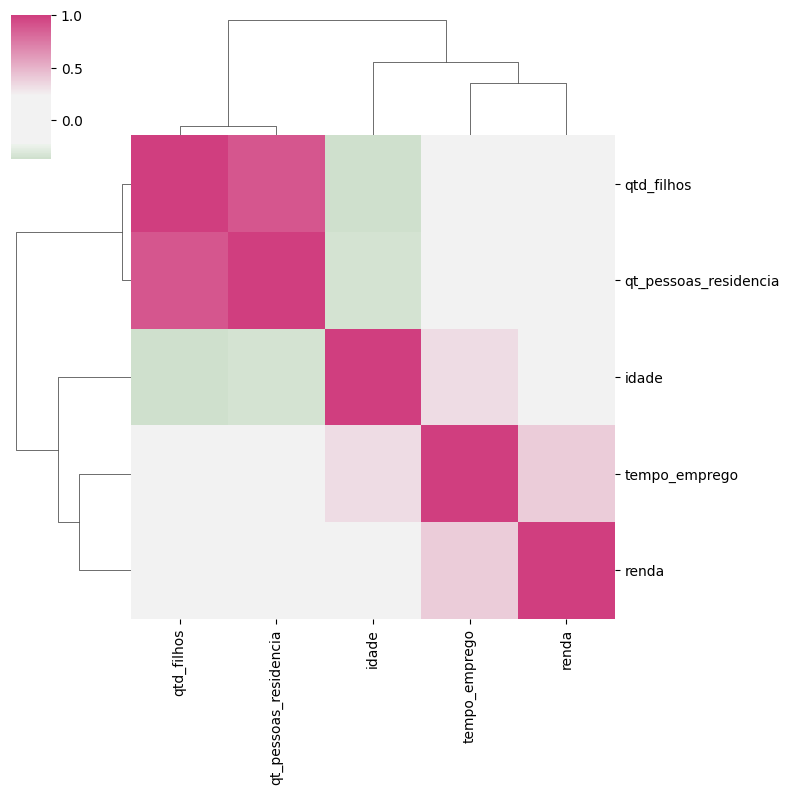

In [154]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
ax = sns.clustermap(matriz.drop(columns='mau').corr(),figsize=(8,8), center=0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

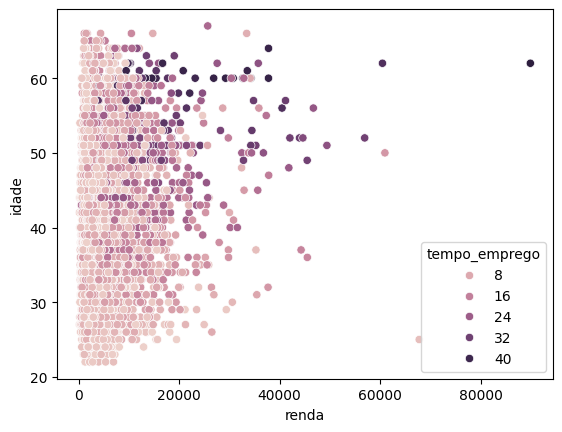

In [187]:
ax = sns.scatterplot(matriz, x='renda', y='idade', hue='tempo_emprego')

3) Na sua opinião, há outliers na variável renda?

In [233]:
matriz[['renda']].describe().T
# IQR = 3.736,38

,count,mean,std,min,25%,50%,75%,max
renda,9837.0,4624.138164,4665.453715,159.9,1934.27,3261.98,5670.65,89918.04


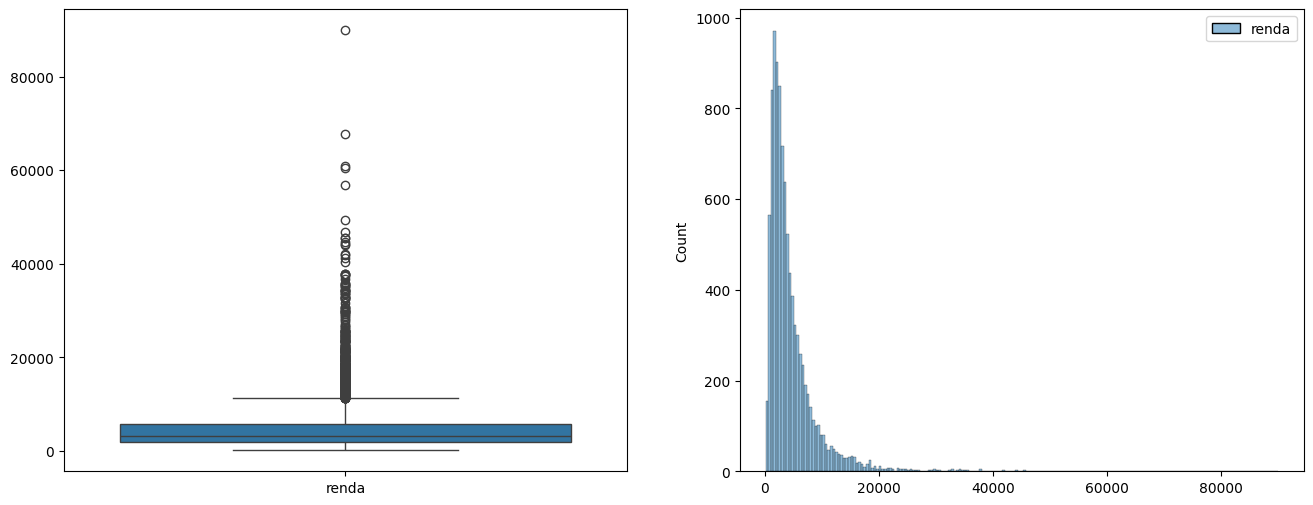

In [251]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
ax = sns.boxplot(matriz[['renda']], ax=axs[0])
ax = sns.histplot(matriz[['renda']], ax=axs[1])

Apos analizar o boxplot ta variável renda e utilizar o metodo de de intervalo de interquartil (IQR), é possivel ver a existência de outliers nessa variável, portanto, há sim outliers que podem alterar o resultado de algumas análizes.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [260]:
# Método de calculo de log utilizado na aula 3 do modulo 10

# df4_log = df4.copy()
# df4_log['log_y'] = np.log(df4_log['y'])

# _ = sns.regplot(x='x', y='log_y', data = df4_log)

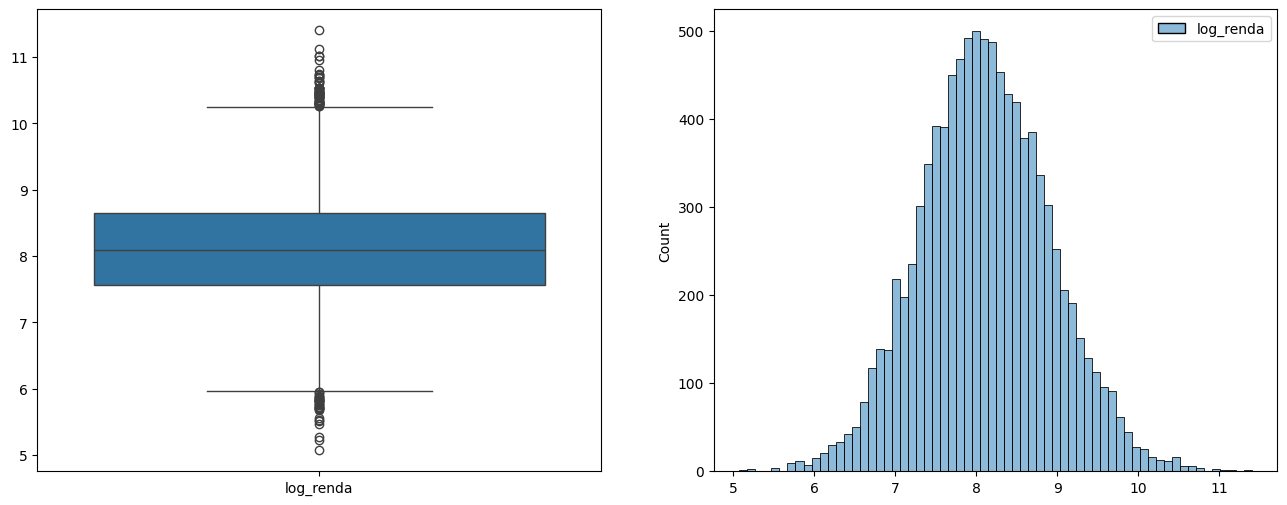

In [261]:
renda_log = matriz.copy()
renda_log['log_renda'] = np.log(renda_log['renda'])
renda_log.drop_duplicates().reset_index().drop(columns='index')

fig, axs = plt.subplots(ncols=2, figsize=(16,6))
ax = sns.boxplot(renda_log[['log_renda']], ax=axs[0])
ax = sns.histplot(renda_log[['log_renda']], ax=axs[1])

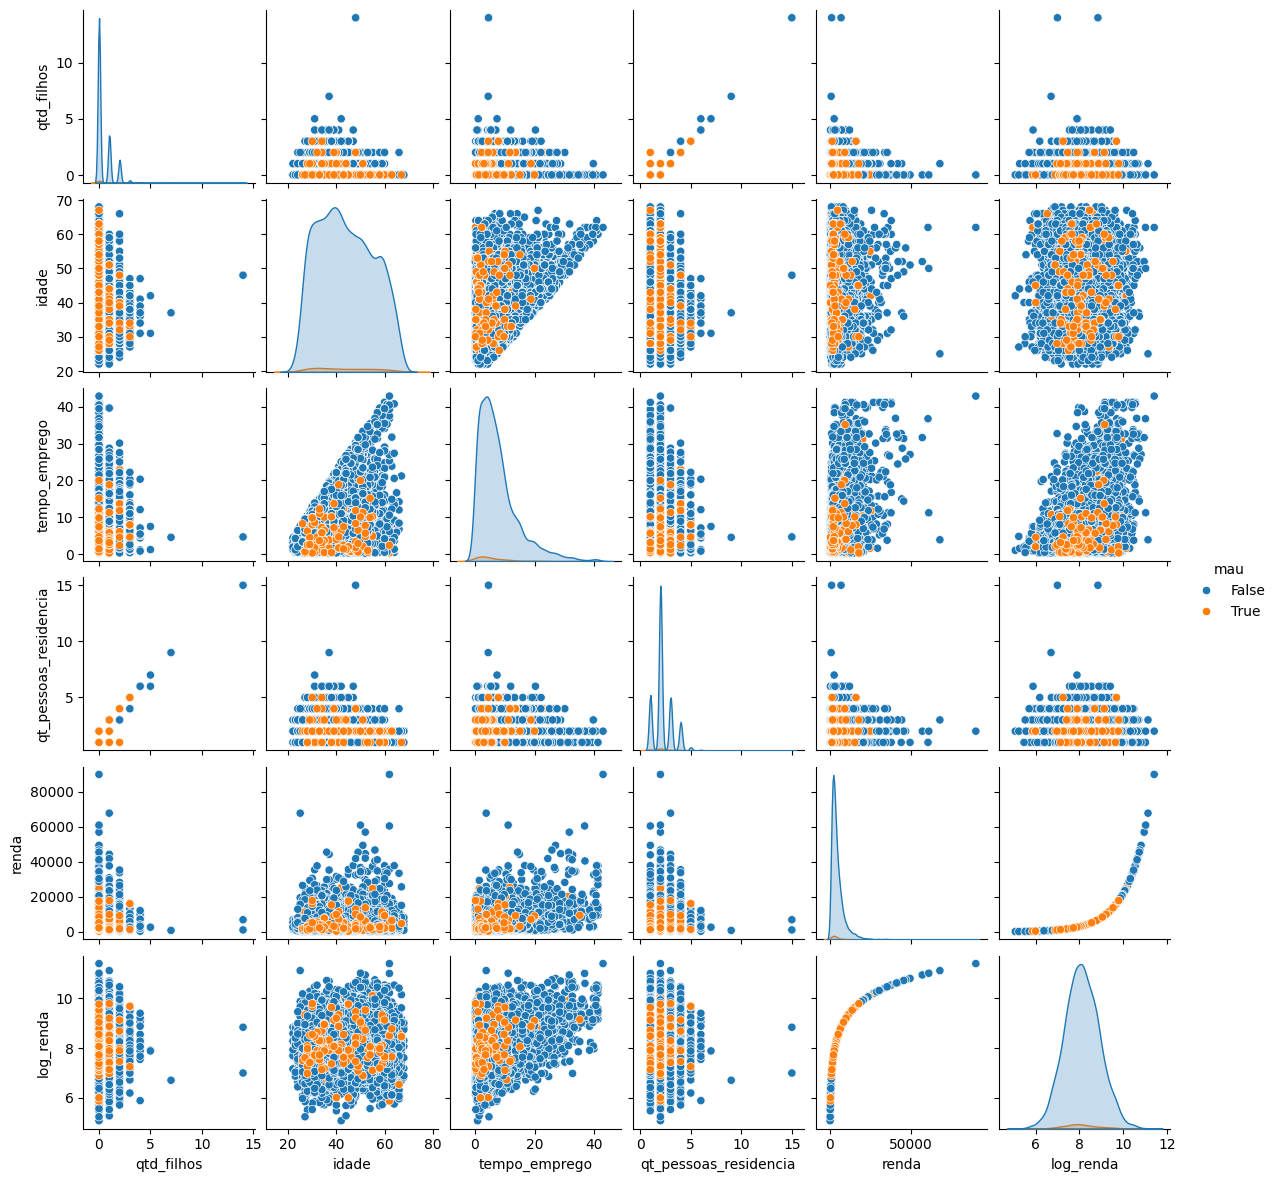

In [263]:
ax = sns.pairplot(renda_log, height=2, aspect=1, hue='mau')

In [264]:
renda_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,log_renda
qtd_filhos,1.000000,-0.371231,-0.072918,0.894353,0.009769,0.004787,0.019936
idade,-0.371231,1.000000,0.324236,-0.347207,0.040577,-0.004583,0.025354
tempo_emprego,-0.072918,0.324236,1.000000,-0.065472,0.397654,-0.044488,0.381950
qt_pessoas_residencia,0.894353,-0.347207,-0.065472,1.000000,0.019410,-0.008295,0.030298
renda,0.009769,0.040577,0.397654,0.019410,1.000000,-0.010004,0.831784
mau,0.004787,-0.004583,-0.044488,-0.008295,-0.010004,1.000000,-0.012677
log_renda,0.019936,0.025354,0.381950,0.030298,0.831784,-0.012677,1.000000


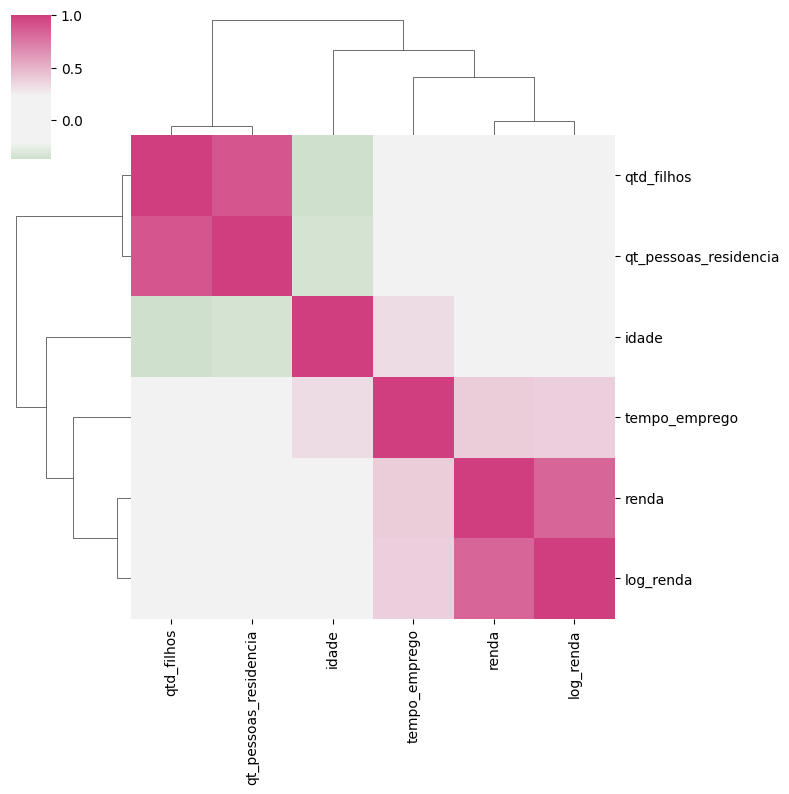

In [ ]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
ax = sns.clustermap(renda_log.drop(columns='mau').corr(),figsize=(8,8), center=0, cmap=cmap)

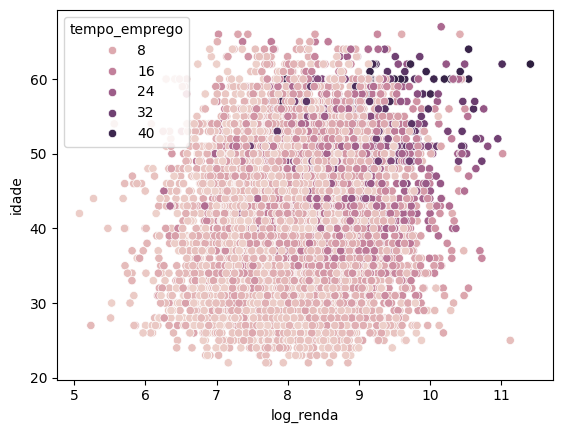

In [268]:
ax = sns.scatterplot(renda_log, x='log_renda', y='idade', hue='tempo_emprego')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Com a aplicação do LOG a análize da variável renda se mostrou muito mais coerente e possibilita uma melhor visualização de correlações com outras variaveis.